<a href="https://colab.research.google.com/github/Felipe0Parra/IO/blob/main/Visi%C3%B3n%20humana%20y%20animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visión humana y animal

### Librerías

In [ ]:
import numpy as np
import scipy as sp
from scipy.fft import fft2
from scipy.fft import ifft2
from scipy.fft import fftfreq
from scipy.fft import fftshift, ifftshift
import imageio
import PIL
from PIL import Image, ImageFilter, ImageDraw, ImageFont
import cv2

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from matplotlib.animation import PillowWriter
import pint

from PIL import Image

u = pint.UnitRegistry()

# Funciones auxiliares

URLs:

In [ ]:
def URL_ADAP(URL):
    URL = str(URL)
    URL2 = URL.replace('\\', '/')
    return URL2

Normalización de matrices:

In [ ]:
def normalize_image(image):
    normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return normalized_image

Calcular la intensidad de un campo:

In [ ]:
def intensidad_del_campo(campo):
    intensidad_espectro_imagen = np.abs(campo)**2
    return intensidad_espectro_imagen

## Ojo humano

### Aproximaciones

Se construye un sistema óptico aproximado que sea equivalente al ojo humano, en composición y capacidades.

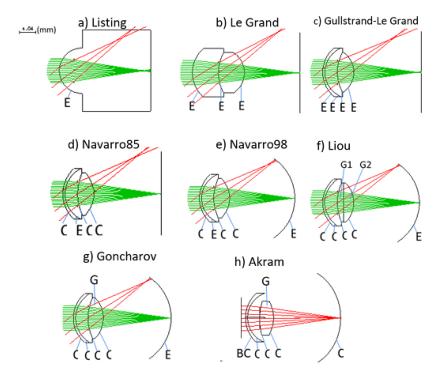

In [ ]:
diag_ojo_00 = cv2.imread(URL_ADAP(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Ojos artificiales.png'))

plt.figure()
plt.imshow(diag_ojo_00)
plt.axis('off')
plt.show()

Según las simulaciones de trazado de rayos y la propia experiencia visual, es posible comprender como se da la formación de imagenes por medio del ojo, esto, ayudandonos de la ultima entrega donde se evidencia como el angulo de incidencia de una onda plana se traduce en una frecuencia diferente de cero en el plano de Fourier. Esto es util, debido a que ondas planas de altas frecuencias corresponden a rayos incidentes en angulos muy grandes respecto al eje óptico.


Debido a la forma en la que se proyecta la imagen, se salen significativamente de la región sensible de mas alta resolución, por lo cual, no aportan detalles significativos en la formación de la imagen, la pupila entonces, funciona como un diafragme a de apertura el cual limita la cantidad de luz que aporta cada una de las ondas planas incidentes a la formación de la imagen, es decir, controla la intensidad total que está llegando de luz, es por esto, por lo cual, a lo largo del dia, y con diferentes cantidades de iluminación tenemos una capacidad visual similar, similar y no igual dado que los conos no funcionan apropiadamente en condiciones de poca luz, por lo cual, se pierde un poco de resolución, ya que participan menos sensores en el muestreo de la imagen, debido a que su ausencia reduce el factor de llenado del muestreo.

Se usa el ojo esquematico de Gullstrand - Emsley

## Analisis matricial

En esta sección analisaremos las caracteristicas totales del sistema óptico equivalente del ojo para establecer las características de formación de la imagen:

In [ ]:
def Matriz(tipo):
    if tipo == 0:
        nt = float(input("Dame el valor de nt: "))
        ni = float(input("Dame el valor de ni: "))
        R = float(input("Dame el valor de R: "))
        Ra = np.array([[1, 0], [0, 1]], dtype=float)
        P = (nt - ni) / R
        Ra[0, 1] = -P
        print("Ra:\n", Ra)
        return Ra

    elif tipo == 1:
        Re = np.array([[1, 0], [0, 1]], dtype=float)
        ni = float(input("Dame el valor de ni: "))
        R = float(input("Dame el valor de R: "))
        M12 = 2 * ni / R
        Re[0, 1] = M12
        print("Re:\n", Re)
        return Re

    elif tipo == 2:
        T = np.array([[1, 0], [0, 1]], dtype=float)
        D = float(input("¿Cuál es la distancia de la traslación? "))
        n = float(input("¿Cuál es el coeficiente n? "))
        M21 = D / n
        T[1, 0] = M21
        print("T:\n", T)
        return T

    elif tipo == 3:
        Ld = np.array([[1, 0], [0, 1]], dtype=float)
        nl = float(input("Dame el valor de nl "))
        ni = float(input("Dame el valor de n "))
        R1 = float(input("Dame el R del primer vértice "))
        R2 = float(input("Dame el R del segundo vértice "))
        P = (nl - ni) * ((1 / R1) - (1 / R2))
        Ld[0, 1] = P
        print("Ld:\n", Ld)
        return Ld

    elif tipo == 4:
        Lg = np.array([[0, 0], [0, 0]], dtype=float)
        n1 = float(input("Dame el valor de n1 "))
        nl = float(input("Dame el valor de nl "))
        n2 = float(input("Dame el valor de n2 "))
        R1 = float(input("Dame el valor de R1 "))
        R2 = float(input("Dame el valor de R2 "))
        Dl = float(input("¿Cuál es el grosor de la lente? "))
        PV1 = (nl - n1) / R1
        PV2 = (n2 - nl) / R2
        m11 = 1 - (PV2 * Dl) / nl
        m12 = -PV1 - PV2 + (PV1 * PV2 * Dl) / nl
        m21 = Dl / nl
        m22 = 1 - (PV1 * Dl) / nl
        Lg[0, 0] = m11
        Lg[0, 1] = m12
        Lg[1, 0] = m21
        Lg[1, 1] = m22
        print("Lg:\n", Lg)
        return Lg

    else:
        print("Tipo no reconocido. Introduce un valor entre 0 y 4.")
        return None

numero_matrices = int(input("¿Cuántas matrices son?: "))
lista = []

i = 0
while i < numero_matrices:
    tipo = int(input("Introduce el tipo (0 para una matriz de refracción,\n\
    1 para reflexión,\n\
    2 para traslación,\n\
    3 para lente delgada,\n\
    4 para lente gruesa): "))
    corrector = str(input("No equivocado 1,\n\
    si 2 y borrar ultima matriz,\n\
    3 si quieres repetir else 0"))

    if corrector == "1":
        matriz = Matriz(tipo)
        if matriz is not None:
            lista.append(matriz)
            i += 1
    elif corrector == "2":
        i = i-1
        lista.pop()
        print("Corrigiendo los valores de la ultima matriz.")

    elif corrector == 3:
        print("Corregir eltipo de matriz ")
        continue

    elif corrector == "0":
        print("Volviste a empezar...")
        lista.clear()
        i = 0

    print("# de matriz")
    print(i)

print(lista)

lista.reverse()

print(lista)

resultado = lista[0]

# Multiplicar las matrices
for matriz in lista[1:]:
    resultado = np.dot(resultado, matriz)

print("# de matriz...")

print("\nResultado de la multiplicación de matrices:\n")
print(resultado)

planos_principales = str(input("\nCalcularas con planos principales? "))

if planos_principales == "si":
  np1 = float(input("Cual es el coeficiente de n entre el plano H1 y V1?"))
  np2 = float(input("Cual es el coeficiente de n entre el plano H2 y V2?"))

  Mp11 = resultado[0][0]
  Mp12 = resultado[0][1]
  Mp21 = resultado[1][0]
  Mp22 = resultado[1][1]


  H1V1 = (np1/Mp12)*(1-Mp11)
  H2V2 = (np2/Mp12)*(1-Mp22)

  print("Distancias de los planos principales a los vertices: ")
  print("De H1V1:", H1V1)
  print("De H2V2:", H2V2)

Ra:
 [[ 1.         -0.04269231]
 [ 0.          1.        ]]
# de matriz
1
T:
 [[1.         0.        ]
 [2.70067517 1.        ]]
# de matriz
2
Ra:
 [[ 1.     -0.0083]
 [ 0.      1.    ]]
# de matriz
3
T:
 [[1.         0.        ]
 [2.54237288 1.        ]]
# de matriz
4
Ra:
 [[ 1.         -0.01383333]
 [ 0.          1.        ]]
# de matriz
5
[array([[ 1.        , -0.04269231],
       [ 0.        ,  1.        ]]), array([[1.        , 0.        ],
       [2.70067517, 1.        ]]), array([[ 1.    , -0.0083],
       [ 0.    ,  1.    ]]), array([[1.        , 0.        ],
       [2.54237288, 1.        ]]), array([[ 1.        , -0.01383333],
       [ 0.        ,  1.        ]])]
[array([[ 1.        , -0.01383333],
       [ 0.        ,  1.        ]]), array([[1.        , 0.        ],
       [2.54237288, 1.        ]]), array([[ 1.    , -0.0083],
       [ 0.    ,  1.    ]]), array([[1.        , 0.        ],
       [2.70067517, 1.        ]]), array([[ 1.        , -0.04269231],
       [ 0.        

Para el analisis matricial no me importa la forma o tamaño del objeto que voy a observar. Si mucho, solo las distancias de los plano imagen y objeto. Es el FOV el que me indica la zona disponible para muestreo según el tamaño del objeto.

Tener en cuenta que todas las cantidades están en milimetros hasta que se indique lo contrario.

Calculamos las carácteristicas de formación de la imagen:

In [ ]:
do_X = float(input("Distancia de Obj a V: "))

S = do_X - H1V1
S_p = S/((S * - resultado[0][1])- 1)

print(f"\nLa distancia del plano H al objeto es de: {S}\n\
La distancia del plano H' a la imagen es: {S_p}\n\
La distancia del vertice final a la imagen: {H2V2 + S_p}\n\
El poder del sistema asociado a MHH': {- resultado[0][1]}")

n_m = float(input("\nIndice de refracción primario:\n"))
np_m = float(input("Indice de refracción secundario:\n"))
mx = -(n_m/np_m) * (S_p/S)
malpha = -(S/S_p)

print(f"La magnificación lateral es: {mx}\n\
la magnificación angular es de: {malpha}")

if S_p >= 0:
  print("La imagen es real")

else:
  print("La imagen es virtual")

if mx >= 0:
  print("La imagen es derecha")

else:
  print("La imagen es invertida")


La distancia del plano H al objeto es de: 50001.55593912161
La distancia del plano H' a la imagen es: 16.530566624619844
La distancia del vertice final a la imagen: 11.188641767662821
El poder del sistema asociado a MHH': 0.06051399348614858
La magnificación lateral es: -0.0002480127866394737
la magnificación angular es de: -3024.793830397299
La imagen es real
La imagen es invertida


Calculamos las distancias focales, para el ojo relajado:

In [ ]:
#Distancias focales

f = n_m/-resultado[0][1]
#f = (S_p * S)/(S_p + S)
f_p = np_m/-resultado[0][1]
print(f"Foco: {f}")

Foco: 16.525103408171137


## Resolución

La cantidad de frecuencias espaciales que logran entrar al sistema dependen de la dimensión de la pupila de entrada del ojo, y de la distancia del objeto al sistema óptico, debido a difracción, el diametro de la pupila no es igual a la dimensión de apertura del iris. Sin embargo, esto afecta directamente la resolución desde la definición del criterio de Rayleigh:

In [ ]:
wavelength_nm = 550e-6 # mm

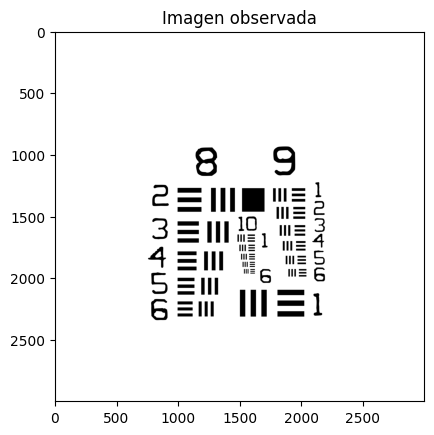

In [ ]:
imagen_obs = normalize_image(cv2.imread(URL_ADAP(r'C:\Users\Felipe\Pictures\Optica_Proyecto\USAF_3000px_cl.png'), 0))

plt.imshow(imagen_obs, cmap = 'gray')
plt.title('Imagen observada')
plt.axis()
plt.show()

In [ ]:
print(f"Tamaño de la imagen: Ancho = {np.shape(imagen_obs)[0]} ; Alto = {np.shape(imagen_obs)[1]}.")

Tamaño de la imagen: Ancho = 3000 ; Alto = 3000.


## Tamaño de la imagen

De que forma afecta el tamño de la imagen?

In [ ]:
T_imagen = 10 # mm

In [ ]:
f_max_imagen = 0.5 * (np.shape(imagen_obs)[0]/T_imagen)
print(f"La maxima frecuencia registrable en el espectro de Fourier de la imagen es: {f_max_imagen / 1000} um^-1.")

La maxima frecuencia registrable en el espectro de Fourier de la imagen es: 0.15 um^-1.


Lo cual corresponde a cuanto, desde el centro, hasta uno de los extremos, sabiendo que es cuadrada la imagen, mide un vector a lo largo del eje en el espacio de las frecuencias.

## Dimensiones del problema

Según el criterio de Rayleigh, se puede obtener la maxima frecuencia en el espacio de Fourier que deja ingresar el iris:

In [ ]:
# Calculo de las dimensiones de la pupila de entrada
n = 4/3
n_prima = 1
l = -3.6 # mm
F_cornea = 0.042735 # Poder convertido en mm^-1.
l_prima = n_prima * l /(n + l * F_cornea) # mm

M_pupila = (n * l_prima)/(n_prima * l)


n_aire = 1
D_iris = 6 # mm
D_PE = D_iris * M_pupila # mm
S_o = 2500 # mm                                 # Todas las unidades en milimetros.

print(f"Magnificación de la pupila de entrada de D_PE = {np.round(D_PE, 3)} mm respecto al iris: {np.round(M_pupila, 3)}.")

Magnificación de la pupila de entrada de D_PE = 6.783 mm respecto al iris: 1.13.


In [ ]:
f_max_iris_cercano = (n_aire * D_PE)/(1.22 * wavelength_nm * 250)

print(f"Frecuencia maxima permitida por la pupila de entrada en su punto de maxima recoleección z = 25 cm: {f_max_iris_cercano / 1000} um^-1.")

Frecuencia maxima permitida por la pupila de entrada en su punto de maxima recoleección z = 25 cm: 0.04043283344837078 um^-1.


In [ ]:
f_max_iris = (n_aire * D_PE)/(1.22 * wavelength_nm * S_o)

print(f"Frecuencia maxima permitida por la pupila de entrada: {f_max_iris / 1000} um^-1.")

Frecuencia maxima permitida por la pupila de entrada: 0.004043283344837078 um^-1.


In [ ]:
portion_fqs =  100 * (f_max_iris/f_max_imagen)
print(f"Porción de frecuencias abarcadas por la pupila de entrada: {np.round(portion_fqs, 3)} %.")

Porción de frecuencias abarcadas por la pupila de entrada: 2.696 %.


### Escala en el espacio de Fourier:

Si yo se que lo que me marca mi distribución en el espectro de Fourier es la dimensión de los detalles en referencia al tamaño de la imagen según la cantidad de pixeles, debido a que es el tamaño del pixel en mi imagen el que determina el tamaño del plano de Fourier. Y es el tamaño de la imagen, el que me determina el tamaño del pixel en el espacio de Fourier.

In [ ]:
T_pixel_Fourier = 1/T_imagen  # mm^-1
print(f"Tamaño del pixel en el espacio de las frecuencias: {T_pixel_Fourier / 1000} micrometros^-1.")

Tamaño del pixel en el espacio de las frecuencias: 0.0001 micrometros^-1.


Comprobemos que sea coherente la escala del espacio de frecuencias:

In [ ]:
print("Tamaño del pixel en el espacio de Fourier por la cantidad de pixeles")
print("debe ser igual al doble de la frecuencia espacial maxima")
print(f"Por lo cual: {np.shape(imagen_obs)[0] * T_pixel_Fourier / 1000} um^-1 = {f_max_imagen * 2 / 1000} um^-1.")

Tamaño del pixel en el espacio de Fourier por la cantidad de pixeles
debe ser igual al doble de la frecuencia espacial maxima
Por lo cual: 0.3 um^-1 = 0.3 um^-1.


- Si la imagen está muy lejos, la difracción limita enormemente la cantidad de frecuencias que pueden ingresar al sistema dada su apertura.
- El tamaño de la pupila de entrada en el espectro de Fourier es constante dado que es fisicamente constante, por lo cual deja pasar siempre la misma cantidad de frecuencias para diferentes objetos a la misma distancia z de su apertura. Lo que cambia, es la proporción entre la frecuencia correspondiente al detalle minimo que compone la imagen y las frecuencias que ella deja pasar, pues a mayor dimensión del detalle minimo, es decir, mayor tamaño del pixel que forma la imagen, para una dimensión de imagen constante, mas grande es la pupila con respecto al espectro de la imagen, pues la maxima frecuencia es menor.

## --Padding de la imagen para volverla cuadrada--

In [ ]:
imagen = imagen_obs

alto, ancho = imagen.shape
tamaño_cuadrado = max(alto, ancho)

padding_alto = (tamaño_cuadrado - alto) // 2
padding_ancho = (tamaño_cuadrado - ancho) // 2

padding = ((padding_alto, tamaño_cuadrado - alto - padding_alto),
           (padding_ancho, tamaño_cuadrado - ancho - padding_ancho))

imagen_cuadrada = np.pad(imagen, padding, mode = 'constant', constant_values = 0)

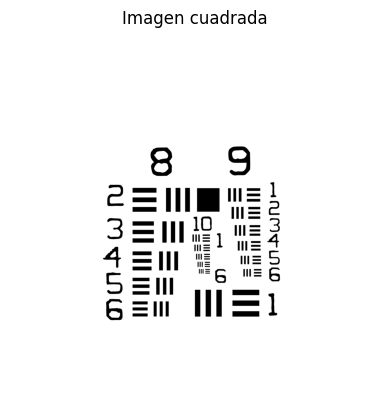

In [ ]:
plt.imshow(imagen_cuadrada, cmap = 'gray')
plt.title('Imagen cuadrada')
plt.axis('off')
plt.show()

In [ ]:
plt.imsave(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Imagen observada.png', imagen_cuadrada, cmap = 'gray')

In [ ]:
url_imagen = URL_ADAP(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Imagen observada.png')

## --Desarrollo del algoritmo de construcción de las aberraciones por medio de los polinomios de Zernike--

Antes de construir la forma geometría que contiene los polinomios de Zernike, es importante tener en cuenta que las aberraciones se dan sobre la superficie de la cornea, la cual tiene un diametro diferente al de la pupila de entrada, y mayor, por lo cual deja pasar mas frecuencias, es decir, es mas grande, logicamente.

In [ ]:
D_cornea = 12 # mm
f_max_cornea = (n * D_cornea)/(1.22 * wavelength_nm * S_o) # mm^-1
print(f"Frecuencias permitadas por la cornea y por la pupila respectivamente: {f_max_cornea * 1000} um^-1 y {f_max_iris * 1000}um^-1.")

Frecuencias permitadas por la cornea y por la pupila respectivamente: 9538.00298062593 um^-1 y 4043.283344837078um^-1.


El calculo usa el diametro, pero geometrícamente se trabaja con el radio, solo que el dos se recombina en la formula, dado r = D/2.

Escalando al espacio de frecuencias:

In [ ]:
R_pixels_cornea = f_max_cornea / T_pixel_Fourier
print(f"Cantidad del radio de pixeles que forman la pupila equivalente de la cornea: {R_pixels_cornea}.")

Cantidad del radio de pixeles que forman la pupila equivalente de la cornea: 95.38002980625929.


El tamaño de la cornea en el espacio de Fourier tambien es importante porque la pupila de entrada no deja pasar la totalidad de las frecuencias que son aberradas por la cornea, que es mas grande, por lo cual, se define un tamaño constante para la cornea de 12 mm, y dado el rango de valores que puede tomar la pupila de entrada según la dilatación del iris, hay una región de aberraciones mas grande o mas pequeña abarcada. Esto es importante debido que casi no hay aberraciones significativas en el centro de la cornea, por lo cual pupilas pequeñas dejan pasar muchas menos aberraciones.

## Observaciones hasta este punto:

Vemos que la cantidad de pixeles que permiten el paso de frecuencias es minimo, practicamente nulo, esto podría indicar un mal funcionamiento del analisis, sin embargo, hay que considerar la geometría del sistema, pues el objeto es muy pequeño y está ubicado a una distancia muy grande, lo cual, es el resultado esperado, pues para estas condiciones es simplmente imposible distinguir cualquier detalle en el objeto.

Z_0 (n=0, m=0): Pistón (desplazamiento constante)
Z_1 (n=1, m=-1): Inclinación vertical
Z_2 (n=1, m=1): Inclinación horizontal
Z_3 (n=2, m=-2): Astigmatismo oblicuo (45°)
Z_4 (n=2, m=0): Desenfoque (defocus)
Z_5 (n=2, m=2): Astigmatismo vertical/horizontal (0°/90°)
Z_6 (n=3, m=-3): Trefoil vertical
Z_7 (n=3, m=-1): Coma vertical
Z_8 (n=3, m=1): Coma horizontal
Z_9 (n=3, m=3): Trefoil horizontal
Z_10 (n=4, m=-4): Tetrafoil oblicuo
Z_11 (n=4, m=-2): Astigmatismo oblicuo secundario
Z_12 (n=4, m=0): Aberración esférica
Z_13 (n=4, m=2): Astigmatismo vertical secundario
Z_14 (n=4, m=4): Tetrafoil vertical/horizontal


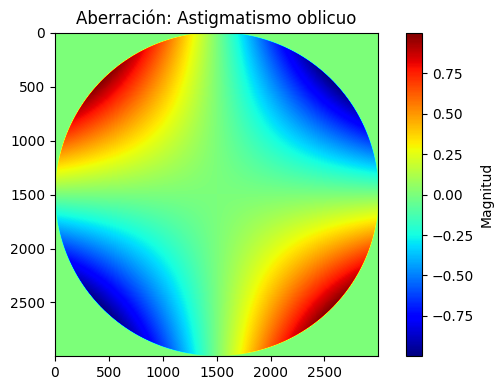

Pesos utilizados para 'Astigmatismo oblicuo':
  Z_3 (n=2, m=-2): 1.0 - Astigmatismo oblicuo (45°)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.colors import LinearSegmentedColormap

def cart2pol(x, y):
    """Conversión de coordenadas cartesianas a polares"""
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return rho, phi

def zernike_polynomial(n, m, rho, phi):
    """
    Calcula el polinomio de Zernike de orden n, frecuencia m
    para las coordenadas polares rho (radio) y phi (ángulo)
    """
    # Verificación de paridad n-m
    if (n - abs(m)) % 2 != 0:
        return np.zeros_like(rho)

    if m >= 0:  # Componente par
        return radial_polynomial(n, abs(m), rho) * np.cos(m * phi)
    else:  # Componente impar
        return radial_polynomial(n, abs(m), rho) * np.sin(abs(m) * phi)

def radial_polynomial(n, m, rho):
    """Calcula la parte radial del polinomio de Zernike"""
    R = np.zeros_like(rho)

    # Solo calcular para puntos dentro del círculo unitario
    valid_points = rho <= 1

    for k in range((n - m) // 2 + 1):
        coef = (-1)**k * factorial(n - k)
        coef /= (factorial(k) * factorial((n + m) // 2 - k) * factorial((n - m) // 2 - k))
        R[valid_points] += coef * rho[valid_points]**(n - 2*k)

    return R

def factorial(n):
    """Calcula el factorial de n"""
    if n <= 1:
        return 1
    return n * factorial(n - 1)

def generate_zernike_basis(size, max_order=4):
    """
    Genera una base de polinomios de Zernike hasta el orden especificado

    Args:
        size: Tamaño de la matriz cuadrada
        max_order: Orden máximo de polinomios a generar

    Returns:
        Dictionary con polinomios de Zernike y sus nombres
    """
    # Crear meshgrid para coordenadas
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)

    # Convertir a coordenadas polares
    rho, phi = cart2pol(X, Y)

    # Crear máscara circular
    mask = rho <= 1

    # Diccionario para almacenar los polinomios
    zernike_dict = {}

    # Generar polinomios hasta el orden max_order
    # Utilizando índices OSA/ANSI estándar
    j = 0
    for n in range(max_order + 1):
        for m in range(-n, n + 1, 2):
            # Calcula el polinomio
            Z = zernike_polynomial(n, m, rho, phi)

            # Aplicar máscara circular
            Z_masked = Z.copy()
            Z_masked[~mask] = 0

            # Calcular índice OSA/ANSI
            if m < 0:
                index_type = "impar"
            else:
                index_type = "par"

            # Almacenar en diccionario
            zernike_name = f"Z_{j} (n={n}, m={m})"
            zernike_dict[zernike_name] = Z_masked
            j += 1

    return zernike_dict

def get_standard_zernike_indices():
    """
    Devuelve un diccionario con los índices estándar de Zernike (notación OSA/ANSI)
    y sus descripciones correspondientes
    """
    return {
        "Z_0 (n=0, m=0)": "Pistón (desplazamiento constante)",
        "Z_1 (n=1, m=-1)": "Inclinación vertical",
        "Z_2 (n=1, m=1)": "Inclinación horizontal",
        "Z_3 (n=2, m=-2)": "Astigmatismo oblicuo (45°)",
        "Z_4 (n=2, m=0)": "Desenfoque (defocus)",
        "Z_5 (n=2, m=2)": "Astigmatismo vertical/horizontal (0°/90°)",
        "Z_6 (n=3, m=-3)": "Trefoil vertical",
        "Z_7 (n=3, m=-1)": "Coma vertical",
        "Z_8 (n=3, m=1)": "Coma horizontal",
        "Z_9 (n=3, m=3)": "Trefoil horizontal",
        "Z_10 (n=4, m=-4)": "Tetrafoil oblicuo",
        "Z_11 (n=4, m=-2)": "Astigmatismo oblicuo secundario",
        "Z_12 (n=4, m=0)": "Aberración esférica",
        "Z_13 (n=4, m=2)": "Astigmatismo vertical secundario",
        "Z_14 (n=4, m=4)": "Tetrafoil vertical/horizontal"
    }

def combine_zernike(zernike_dict, weights):
    """
    Combina los polinomios de Zernike usando pesos específicos

    Args:
        zernike_dict: Diccionario con polinomios de Zernike
        weights: Diccionario con pesos para cada polinomio

    Returns:
        Matriz combinada de polinomios con pesos aplicados
    """
    combined = np.zeros_like(list(zernike_dict.values())[0])

    for name, coef in weights.items():
        if name in zernike_dict:
            combined += coef * zernike_dict[name]

    return combined

# Diccionario con pesos para aberraciones comunes
# Corregido para usar los índices correctos según notación estándar OSA/ANSI
aberration_weights = {
    "Desenfoque": {"Z_4 (n=2, m=0)": 1.0},
    "Astigmatismo oblicuo": {"Z_3 (n=2, m=-2)": 1.0},
    "Astigmatismo vertical": {"Z_5 (n=2, m=2)": 1.0},  # Corregido: Z_5 para astigmatismo vertical
    "Coma vertical": {"Z_7 (n=3, m=-1)": 1.0},
    "Coma horizontal": {"Z_8 (n=3, m=1)": 1.0},
    "Trefoil vertical": {"Z_6 (n=3, m=-3)": 1.0},
    "Trefoil horizontal": {"Z_9 (n=3, m=3)": 1.0},
    "Aberración esférica": {"Z_12 (n=4, m=0)": 1.0},
    "Miopía": {"Z_4 (n=2, m=0)": -1.0},
    "Hipermetropía": {"Z_4 (n=2, m=0)": 1.0},
    "Combinada": {
        "Z_4 (n=2, m=0)": 0.5,   # Desenfoque
        "Z_5 (n=2, m=2)": 0.3,   # Astigmatismo vertical (corregido)
        "Z_7 (n=3, m=-1)": 0.2,  # Coma vertical
        "Z_12 (n=4, m=0)": 0.1   # Aberración esférica
    }
}

def process_image_with_zernike(image_path, aberration_type, max_order, display=True):
    """
    Procesa una imagen utilizando polinomios de Zernike para simular aberraciones ópticas

    Args:
        image_path: Ruta a la imagen a procesar
        aberration_type: Tipo de aberración a aplicar
        max_order: Orden máximo de polinomios a generar
        display: Si es True, muestra la visualización
    """
    # Cargar imagen en escala de grises
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"No se pudo cargar la imagen desde: {image_path}")

    # Obtener tamaño de la imagen
    size = img.shape[0]

    # Generar base de polinomios de Zernike
    zernike_basis = generate_zernike_basis(size, max_order)

    # Obtener descripciones estándar para referencia
    zernike_descriptions = get_standard_zernike_indices()

    # Verificar que los polinomios generados correspondan con las descripciones estándar
    for name in zernike_basis.keys():
        if name in zernike_descriptions:
            print(f"{name}: {zernike_descriptions[name]}")

    # Verificar si la aberración solicitada existe
    if aberration_type not in aberration_weights:
        raise ValueError(f"Tipo de aberración desconocido: {aberration_type}")

    # Obtener pesos para la aberración seleccionada
    weights = aberration_weights[aberration_type]

    # Verificar si todos los polinomios necesarios están disponibles
    missing_polynomials = [name for name in weights.keys() if name not in zernike_basis]
    if missing_polynomials:
        print(f"Advertencia: Los siguientes polinomios no están disponibles: {missing_polynomials}")
        print("Esto puede afectar la precisión de la aberración simulada.")

    # Combinar polinomios según los pesos
    combined_zernike = combine_zernike(zernike_basis, weights)

    if display:
        # Crear un mapa de colores personalizado para mejor visualización
        colors = [(0, 0, 0.5), (0, 0, 1), (0, 0.5, 1), (0, 1, 1),
                  (0.5, 1, 0.5), (1, 1, 0), (1, 0.5, 0), (1, 0, 0), (0.5, 0, 0)]
        custom_cmap = LinearSegmentedColormap.from_list('custom_zernike', colors, N=256)

        # Visualizar el resultado
        plt.figure(figsize=(6, 4))
        plt.imshow(combined_zernike, cmap='jet')
        plt.title(f"Aberración: {aberration_type}")
        plt.colorbar(label="Magnitud")
        plt.axis()
        plt.tight_layout()
        plt.show()

        # Mostrar información sobre los pesos utilizados
        print(f"Pesos utilizados para '{aberration_type}':")
        for name, weight in weights.items():
            if name in zernike_descriptions:
                print(f"  {name}: {weight} - {zernike_descriptions[name]}")
            else:
                print(f"  {name}: {weight}")

    return combined_zernike, zernike_basis

def visualize_zernike_basis(zernike_basis, rows=4, cols=5):
    """
    Visualiza todos los polinomios de Zernike en la base

    Args:
        zernike_basis: Diccionario con polinomios de Zernike
        rows: Número de filas en la visualización
        cols: Número de columnas en la visualización
    """
    # Obtener descripciones estándar
    zernike_descriptions = get_standard_zernike_indices()

    plt.figure(figsize=(15, 12))

    for i, (name, Z) in enumerate(zernike_basis.items()):
        if i >= rows * cols:
            break

        plt.subplot(rows, cols, i + 1)
        plt.imshow(Z, cmap='viridis')

        # Añadir descripción si está disponible
        if name in zernike_descriptions:
            title = f"{name}\n{zernike_descriptions[name]}"
        else:
            title = name

        plt.title(title, fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def validate_zernike_polynomials(size, max_order=4):
    """
    Valida que los polinomios de Zernike se generen correctamente
    comparando con las propiedades esperadas.

    Args:
        size: Tamaño de la matriz para generar los polinomios
        max_order: Orden máximo de polinomios a generar
    """
    # Generar base de polinomios
    zernike_basis = generate_zernike_basis(size, max_order)

    # Obtener descripciones estándar
    zernike_descriptions = get_standard_zernike_indices()

    # Verificar que los polinomios importantes estén presentes
    important_polynomials = [
        "Z_4 (n=2, m=0)",   # Desenfoque
        "Z_5 (n=2, m=2)",   # Astigmatismo vertical
        "Z_3 (n=2, m=-2)"   # Astigmatismo oblicuo
    ]

    missing = [p for p in important_polynomials if p not in zernike_basis]
    if missing:
        print(f"ERROR: Faltan polinomios importantes: {missing}")
    else:
        print("✓ Todos los polinomios importantes están presentes")

    # Verificar que los polinomios tengan las formas esperadas
    # (esto es una validación simplificada, se pueden añadir más pruebas)
    x = np.linspace(-6, 6, size)
    y = np.linspace(-6, 6, size)
    X, Y = np.meshgrid(x, y)
    rho, phi = cart2pol(X, Y)
    mask = rho <= 1

    # Validar desenfoque (debe ser radialmente simétrico)
    if "Z_4 (n=2, m=0)" in zernike_basis:
        defocus = zernike_basis["Z_4 (n=2, m=0)"]
        # En el desenfoque, los valores a la misma distancia del centro deben ser iguales
        is_radial = np.allclose(defocus[mask],
                               radial_polynomial(2, 0, rho[mask]),
                               rtol=1e-5, atol=1e-8)
        print(f"✓ Desenfoque es radialmente simétrico: {is_radial}")

    # Validar astigmatismo vertical (debe tener simetría respecto al eje x)
    if "Z_5 (n=2, m=2)" in zernike_basis:
        astig_vert = zernike_basis["Z_5 (n=2, m=2)"]
        # La suma de elementos simétricos respecto al eje horizontal debe ser cercana a cero
        center = size // 2
        upper_half = astig_vert[:center, :]
        lower_half = np.flip(astig_vert[center+1:, :], axis=0)
        if upper_half.shape == lower_half.shape:
            is_symmetric_x = np.allclose(upper_half - lower_half, 0, rtol=1e-5, atol=1e-5)
            print(f"✓ Astigmatismo vertical tiene simetría esperada: {is_symmetric_x}")

    # Visualizar los polinomios para inspección visual
    visualize_zernike_basis(zernike_basis)

    return zernike_basis

# Función principal
def main(image_path, aberration_type="Combinada", max_order=4, show_basis=False, validate=True):
    """
    Función principal para generar y visualizar polinomios de Zernike

    Args:
        image_path: Ruta a la imagen a procesar
        aberration_type: Tipo de aberración a aplicar
        max_order: Orden máximo de polinomios a generar
        show_basis: Si es True, muestra todos los polinomios de la base
        validate: Si es True, realiza validaciones de los polinomios
    """
    # Validar polinomios si se solicita
    if validate:
        print("Validando polinomios de Zernike...")
        # Obtener tamaño de la imagen para la validación
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError(f"No se pudo cargar la imagen desde: {image_path}")
        size = img.shape[0]
        validate_zernike_polynomials(size, max_order)

    # Procesar imagen con polinomios de Zernike
    combined, basis = process_image_with_zernike(image_path, aberration_type, max_order)

    # Mostrar todos los polinomios si se solicita
    if show_basis:
        visualize_zernike_basis(basis)

    # Mostrar todos los tipos de aberraciones disponibles
    print("\nAberraciones disponibles:")
    for i, aberr_type in enumerate(aberration_weights.keys()):
        print(f"{i+1}. {aberr_type}")

    return combined, basis


combined, basis = process_image_with_zernike(url_imagen, "Astigmatismo oblicuo", 5)

In [ ]:
print(f"Dimensiones de el mapa de color de la aberración: {np.shape(combined)}.")

Dimensiones de el mapa de color de la aberración: (3000, 3000).


## Analisis y vista de una imagen bajo el efecto de una aberración

- La apertura numerica, especifica la resolución que tiene el ojo, expresada normalmente en valores relativos a la distancia focal, puede determinar el poder de las aberraciones. ¿Por qué?
- Como se relaciona el valor de fase con unidades en um, y de la misma forma para expresar esto en dioptrías.

In [ ]:
type(combined)

numpy.ndarray

In [ ]:
type(basis)

dict

Ya que tenemos la aberración como una matriz de datos, debemos comprender de que manera este objeto de fase influye en la formación de una imagen. Para esto, debemos partir de que es un factor de fase, luego, este debe hacer parte del campo complejo el factor de fase dentro del exponente de una exponencial compleja. Y sabiendo que la imagen, corresponde a una distribución de amplitud unicamente, juntos forman un campo complejo.

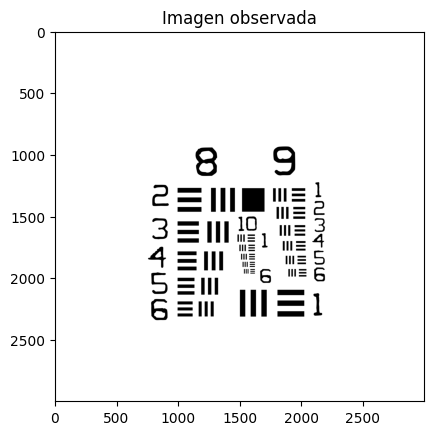

In [ ]:
imagen_obs = normalize_image(cv2.imread(url_imagen, 0))

plt.imshow(imagen_obs, cmap = 'gray')
plt.title('Imagen observada')
plt.axis()
plt.show()

## PSF -  Analisis en el espacio de Fourier

Se supone supone que podemos hacer todas las operaciones en el espacio de Fourier, esto debido a que aunque no hay un plano físico dentro del sistema óptico en el que se forme el espectro de Fourier de la imagen, se trabaja en el espacio de Fourier dado que cada uno de los detalles de una imagen, o los angulos de incidencia de los rayos, se traducen en frecuencias en el espacio de Fourier, es decir, el espectro de FOurier nos habla de como era la luz que forma esa imagen, y vemos que la función de transferencia de un lente es una transformada de Fourier esencialmente, por lo cual, entendemos este proceso como un sistema que modifica la distribución de frecuencias que componen una imagen, en este caso con el objetivo de llevarlas a la fovea dentro del ojo, es por esto que se denomina PSF, pues en español, la traducción directa es función de dispersión de puntos, nombre que parece indicar sobre la forma en la que las diferentes frecuencias espaciales son modificadas por el sistema óptico en el espacio de Fourier, dado que modifica los rayos o la forma de difracción que lleva cada uno de los frentes de onda, de tal forma que la luz recogida forme una imagen acorde a la información que contienen la luz recogida, en este caso por las pupilas finitas y por los objetos de fase presentes en los componentes.

## -- FFT de la imagen --

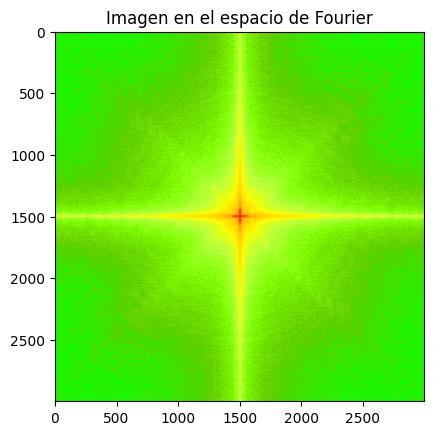

In [ ]:
fft_imagen = fftshift(fft2(imagen_obs))
espectro_img_obs = np.log(0.0001 + np.abs(fft_imagen)**2)

plt.imshow(espectro_img_obs, cmap = 'gist_ncar')
plt.title('Imagen en el espacio de Fourier')
plt.axis()
plt.show()

Es importante tener en cuenta que el tamaño de la pupila no es siempre el mismo que el de la región aberrada, es decir, principalmente la cornea, por lo cual, se debe construir una pupila extra que corresponda al iris y su radio correspondiente, que será igual o menor que el radio de la región aberrada.

### -- TODO EN MILIMETROS --

In [ ]:
lambda_0 = 550e-6

La apertura numerica y la distancia del objeto determinan el rango de frecuencias que logra captar el ojo, por lo cual, apartir de sus dimensiones se debe hallar la resolución que permiten, para modificar el espectro de Fourier de tal manera que se fije la frecuencia limite dada por el sistema óptico del ojo.

## -- Iris --

El tamaño del iris viene dado directamente por la frecuencia espacial que este limita en el espacio de Fourier.

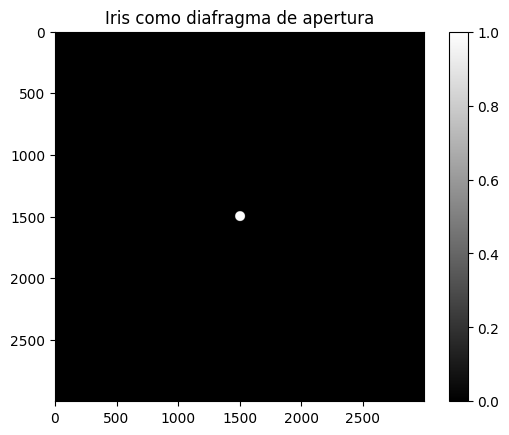

In [ ]:
R_pixels_PE = int(f_max_iris / T_pixel_Fourier)            # Es R dado que representa a una frecuencia medida desde el centro hasta un punto(fx, fy).

iris = np.zeros(np.shape(imagen_obs), dtype = "uint8")
coordx = int(np.shape(imagen_obs)[0]/2)
coordy = int(np.shape(imagen_obs)[1]/2)
cv2.circle(iris, (coordy, coordx), R_pixels_PE, 1, -1)

plt.imshow(iris, cmap = 'gray')
plt.title('Iris como diafragma de apertura')
plt.colorbar()
plt.show()

In [ ]:
int((20/20)*np.shape(imagen_obs)[0]/2) * 2

3000

In [ ]:
np.shape(imagen_obs)

(3000, 3000)

Es necesario definir una escala para cada uno de los diagramas que estemos usando.

## -- Cristalino --

El crsitalino tiene un rango de curvaturas dentro de los cuales se puede deformar, mas allá de estos puntos la luz no logra enfocarse un un punto sino como una mancha, para cada uno de los puntos muestreados sobre la retina, mas allá de este hecho, entre mas cerca esté un objeto del ojo, mayor es la imagen que se forma en la retina, y dentro de la fovea, por lo cual el limite, asumiendo que se logran enfocar adecuadamente todos los puntos de la imagen sobre la superficie de la retina, es el tamaño de la fovea, pues una imagen proyecta por superior a esta area, no se muestrea adecuadamente asi se esté enfocando las mas altas frecuencias sobre la retina.

## -- Escala del factor de aberración --

Para determinar que tanto impacto tiene la aberración en la distorsión de la imagen, se define un peso estandarizado de los valores normalizados de la aberración según un factor relativo a la longitud de onda como: lambda/n. Sabiendo que una vista sana se encuentra dentro de un rango de factores de peso para aberraciones entre lambda/4 y lambda/8.

In [ ]:
aberra_scale_factor = lambda_0/14

In [ ]:
PSF_aberration = iris * np.exp(1j * 2 * np.pi * (1/lambda_0) * combined * (aberra_scale_factor))

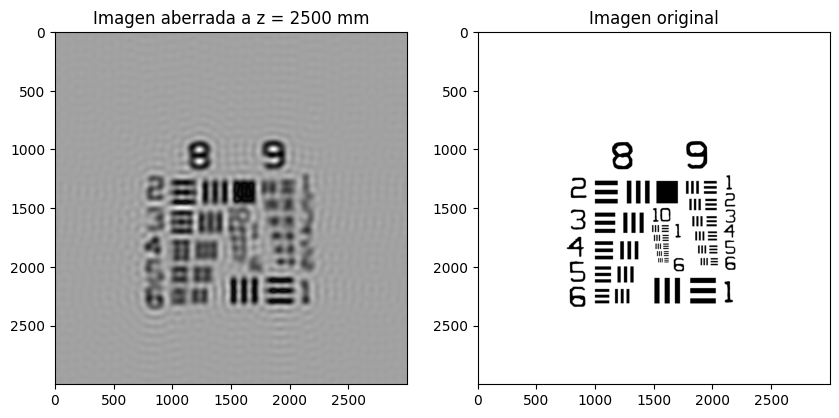

In [ ]:
imagen_aberrada = normalize_image(np.abs(ifft2(PSF_aberration * fft_imagen)))


plt.figure(figsize = (10, 8))

plt.subplot(1, 2, 1)
plt.imshow(imagen_aberrada, cmap = 'gray')
plt.title(f"Imagen aberrada a z = {S_o} mm")
plt.axis()

plt.subplot(1, 2, 2)
plt.imshow(imagen_obs, cmap = 'gray')
plt.title('Imagen original')
plt.axis()

plt.show()

## Conclusiones para la resolución

- Mientras la relación entre el tamaño del pixel de la imagen y la distancia a la que se encuentra, permitan que la pupila de entrada capture todas las frecuencias, la imagen que se proyecta sobre la retina permite distinguir todos los detalles de la imagen, es decir, está en su maxima calidad, esto no es tan común como suena.

- El otro extremo del limite de resolución corresponde a la distancia minima a la que puede enfocar el sistema, si recordamos la relación de planos conjugados y que siempre esperamos proyectar punto a punto una imagen en la retina, obviando la convolución con el disco de Airy.

- La calidad de la imagen, según experiencia del común se mantiene, si ignoramos aberraciones, es decir, la calidad de la retina en terminos de resolución es suficiente a tal punto de ser siempre mayor que la que permite la capacidad de recolección de frecuencias dadas por la pupila de entrada.

- El factor de llenado del sensor determina la frecuencia maxima que es capaz de resolver sin perder detalles debido al aliasing. No es que no pueda formar imagenes, sino que a partir de este punto no se puede garantizar fidelidad en la recuperación de la imagen.

## Analisis comparativo de la imagen normal y la imagen aberrada en terminos del contraste

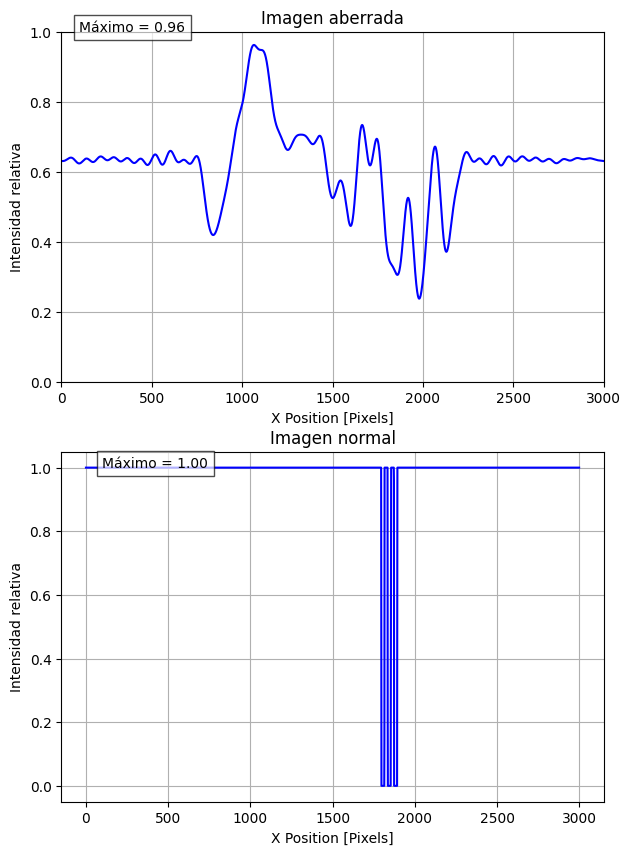

In [ ]:
plt.figure(figsize = (7, 10))

plt.subplot(2, 1, 1)
plt.plot(imagen_aberrada[int(np.shape(imagen_aberrada)[0]/2)], color = 'blue')

plt.text(100, 1,
         f"Máximo = {np.max(imagen_aberrada[int(np.shape(imagen_aberrada)[0]/2)]):.2f}",
         fontsize = 10, color = "black",
         bbox = dict(facecolor = 'white', alpha=0.7, edgecolor = 'black'))

plt.grid()
plt.xlim([0, np.shape(imagen_aberrada)[0]])
plt.ylim([0, 1])
plt.xlabel('X Position [Pixels]')
plt.ylabel('Intensidad relativa')
plt.title(f"Imagen aberrada")

plt.subplot(2, 1, 2)
plt.plot(imagen_obs[int(np.shape(imagen_obs)[0]/2)], color = 'blue')

plt.text(100, 1,
         f"Máximo = {np.max(np.rot90(imagen_obs)[int(np.shape(imagen_obs)[0]/2)]):.2f}",
         fontsize = 10, color = "black",
         bbox = dict(facecolor = 'white', alpha=0.7, edgecolor = 'black'))

plt.grid()
plt.xlabel('X Position [Pixels]')
plt.ylabel('Intensidad relativa')
plt.title(f"Imagen normal")
plt.show()

## Conclusiones importantes del analisis del contraste:

El contraste es importante ya que las celulas fotosensibles varían su capacidad de respuesta según la cantidad de luz que les llega, por lo cual, sino se posee suficiente contraste puede que no sea posible identificar el valor registrado por dos celulas vecinas sobre las cuales cae un detalle.

Claramente las ondulaciones que aparecen no dependen solo de lo que sucede a lo largo del eje mostrado de la imagen normal, pues toda la imagen aporta a la zona luego de la interferencia generada por las aberraciones.

## Criterio de Rayleigh generalizado

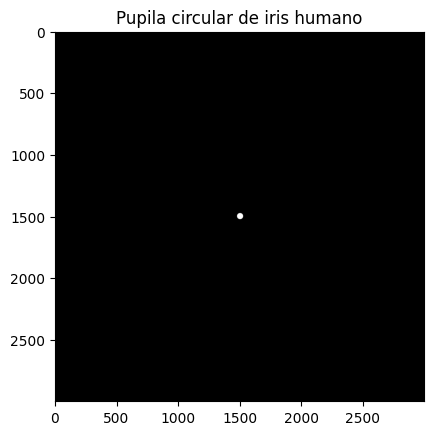

In [ ]:
iris_humano = np.zeros((3000, 3000))

radio_iris_humano = 25

cv2.circle(iris_humano, (1500, 1500), radio_iris_humano, 1, -1)

plt.imshow(iris_humano, cmap = 'gray')
plt.title('Pupila circular de iris humano')
plt.show()

## Generación del patrón de Fraunhofer por PEA

Dimensiones fisicas de la pupila:

In [ ]:
xp = np.shape(iris_humano)[0]
yp = np.shape(iris_humano)[1]

l_planex = 4 # mm
l_planey = 4 # mm

x_pea = np.linspace(0, l_planex, xp)
y_pea = np.linspace(0, l_planey, yp)

xv_pea, yv_pea = np.meshgrid(x_pea, y_pea)

In [ ]:
lam_pea = 550e-6  # mm

In [ ]:
def compute_A(UT, xv, yv, lam, z):
    A = fft2(UT)         # Campo U
    kx = 2 * np.pi * fftfreq(len(x_pea), np.diff(x_pea)[0])
    ky = 2 * np.pi * fftfreq(len(y_pea), np.diff(y_pea)[0])
    kxv, kyv = np.meshgrid(kx, ky)
    k = 2 * np.pi/lam
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))

In [ ]:
z_pea = 24

In [ ]:
U = compute_A(iris_humano, xv_pea, yv_pea, lam_pea, z_pea)

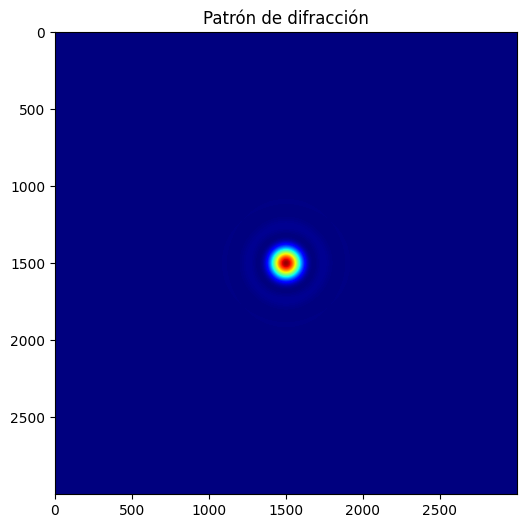

In [ ]:
U_f = normalize_image(intensidad_del_campo(U))

plt.figure(figsize=(6,6))
plt.imshow(U_f, cmap = 'jet')
plt.title('Patrón de difracción')
plt.show()

## -- Sección transversal --

La forma en la que se hayan los valores de coordenadas de los primeros minimos es util pero no es muy versatil.

In [ ]:
b = 0
lista_valores_humano = []
for i in U_f[int(np.shape(U_f)[0]/2)]:
    b = b + 1
    if b > 1250 and b < 1750 and i < 1e-3:
        lista_valores_humano.append((b, i))
        print(f"La posición del primer minimo desde el centro es: ({b}, {i})")

print(lista_valores_humano[0][0])

La posición del primer minimo desde el centro es: (1318, 0.0009608371486169097)
La posición del primer minimo desde el centro es: (1684, 0.0009608371486169047)
1318


Text(0.5, 1.0, 'Distribución de energía Iris humano a z = 24.')

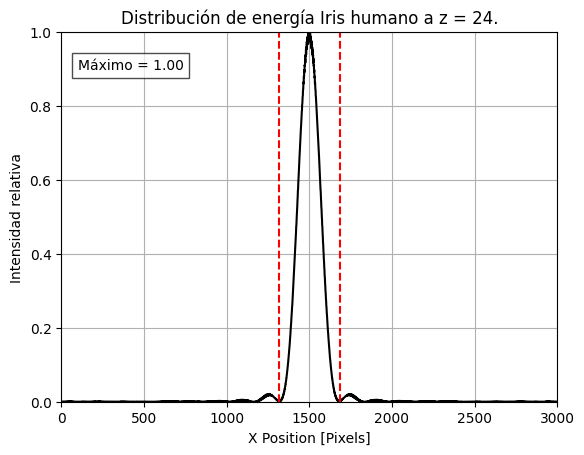

In [ ]:
plt.plot(U_f[int(np.shape(U_f)[0]/2)], color = 'black')

plt.text(100, 0.9,
         f"Máximo = {np.max(U_f[int(np.shape(U_f)[0]/2)]):.2f}",
         fontsize = 10, color = "black",
         bbox = dict(facecolor = 'white', alpha=0.7, edgecolor = 'black'))

plt.grid()
plt.xlim([0, np.shape(U_f)[0]])
plt.ylim([0, 1])
plt.xlabel('X Position [Pixels]')
plt.ylabel('Intensidad relativa')
plt.axvline(lista_valores_humano[0][0], color='r', linestyle='--', label='Teoría (1.22)')
plt.axvline(lista_valores_humano[1][0], color='r', linestyle='--', label='Teoría (1.22)')
plt.title(f"Distribución de energía Iris humano a z = {z_pea}.")

## -- Extracción del valor 1.22 de Rayleigh para pupilas circulares --

In [ ]:
# Distnacia de separación fisica entre los dos primeros minimos del patrón difractado
x_separation = 1500 - lista_valores_humano[0][0]
escala_pxltomm = l_planex/np.shape(iris_humano)[0]
x_minimal = x_separation * escala_pxltomm

# Calculamos el angulo de separación desde el plano de la abertura asumiendo angulos pequeños
theta_min = x_minimal/z_pea

# Calculamos el valor de K para la apertura circular probando lo mostrado por Rayleigh
K_circular = (2 * radio_iris_humano * escala_pxltomm * theta_min)/lam_pea

# Error
K_circ_error = 100 * (K_circular - 1.22)/1.22

print(f"El valor de K para una apertura circular es: {K_circular}, con un error = {K_circ_error}%.")

El valor de K para una apertura circular es: 1.2255892255892253, con un error = 0.45813324501847263%.


## Gradiente de densidad de celulas fotosensibles

El hecho de que la cantidad de celulas por unidad de superficie en el ojo no sea uniforme afecta directamente la imagen recuperada, no solo en este caso por las zonas de diferente densidad de celulas fotosensibles sino por la forma del enlace nervioso de cada zona, debido a que los bastones, que están ubicados en la periferia del ojo mezclan las señales recuperadas, y dado la comparación evolutiva esto indica una mayor agudeza en la identificación de movimiento y realce de fuentes luminosas dada su sensibilidad mayor a la luz.

Para ejemplificarlo, mostraremos secciones de una imagen muestreadas de dos formas diferentes, ejemplificando el hecho de que según el tamaño del objeto, porción de este, debido al campo visual disponible por la geometría de la retina, caerá en una zona o en otra afectando la calidad con la que se muestréa cada porción de la imagen.

In [ ]:
print(f"Frecuencia maxima registrada en el plano de Fourier de la imagen: {f_max_imagen / 1000} um^-1.")

Frecuencia maxima registrada en el plano de Fourier de la imagen: 0.15 um^-1.


In [ ]:
fill_factor_max = 0.35
fill_factor_min = 0.15
T_cellcone = 1.75
f_Nyquist_fovea_max = fill_factor_max/2 * T_cellcone
f_Nyquist_fovea_min = fill_factor_min/2 * T_cellcone

print(f"La maxima frecuencia muestreable sin perdidas de información según el teorema de Nyquist")
print(f"para la porción de la fovea en la retina es: Maxima = {f_Nyquist_fovea_max} um^-1.")
print(f"y minima = {f_Nyquist_fovea_min} um^-1.")

La maxima frecuencia muestreable sin perdidas de información según el teorema de Nyquist
para la porción de la fovea en la retina es: Maxima = 0.30624999999999997 um^-1.
y minima = 0.13125 um^-1.


Vemos que la capacidad de resolución que tiene la fovea se reduce a medida que nos alejamos del eje óptico.

## Pupilas de animales

### Felinos

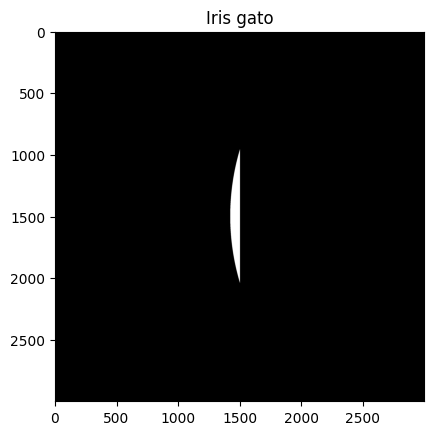

In [ ]:
iris_gato_01 = np.zeros((3000, 3000))

radio_pupila_gato = 1900

cv2.circle(iris_gato_01, (3320, 1500), radio_pupila_gato, 1, -1)
cv2.rectangle(iris_gato_01, (1500, 0), (3000, 3000), 0, -1)

plt.imshow(iris_gato_01, cmap = 'gray')
plt.title('Iris gato')
plt.show()

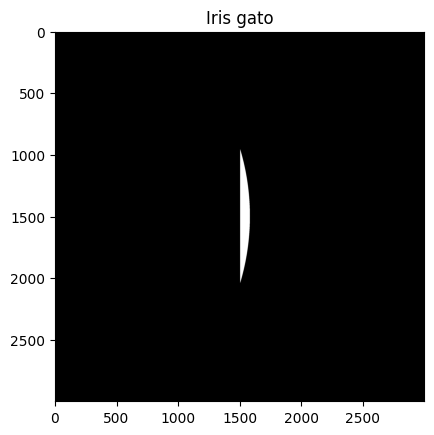

In [ ]:
iris_gato_02 = np.zeros((3000, 3000))

cv2.circle(iris_gato_02, (-320, 1500), radio_pupila_gato, 1, -1)
cv2.rectangle(iris_gato_02, (0, 0), (1500, 3000), 0, -1)

plt.imshow(iris_gato_02, cmap = 'gray')
plt.title('Iris gato')
plt.show()

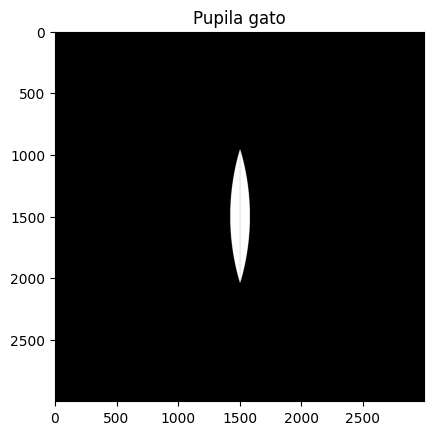

In [ ]:
iris_gato = iris_gato_02 + iris_gato_01

plt.imshow(iris_gato, cmap = 'gray')
plt.title('Pupila gato')
plt.show()

## Difracción para la pupila de un gato

In [ ]:
xp_gato = np.shape(iris_humano)[0]
yp_gato = np.shape(iris_humano)[1]

l_planex_gato = 5 # mm
l_planey_gato = 5 # mm

x_pea_gato = np.linspace(0, l_planex_gato, xp_gato)
y_pea_gato = np.linspace(0, l_planey_gato, yp_gato)

xv_pea_gato, yv_pea_gato = np.meshgrid(x_pea_gato, y_pea_gato)

In [ ]:
z_pea_gato = 80

In [ ]:
U_gato = compute_A(iris_gato, xv_pea_gato, yv_pea_gato, lam_pea, z_pea_gato)

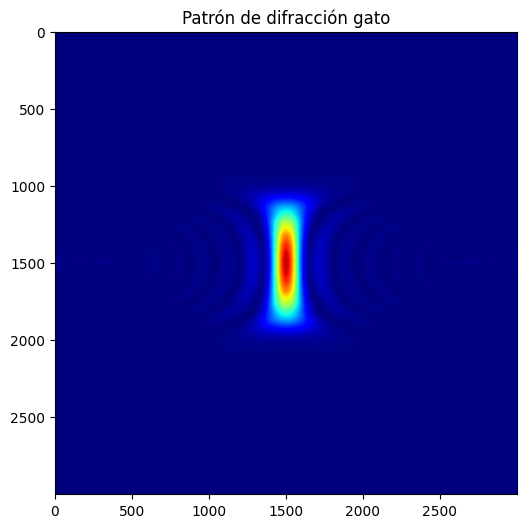

In [ ]:
U_f_gato = normalize_image(intensidad_del_campo(U_gato))

plt.figure(figsize=(6,6))
plt.imshow(U_f_gato, cmap = 'jet')
plt.title('Patrón de difracción gato')
plt.show()

Text(0.5, 1.0, 'Distribución de energía Iris de gato horizontal')

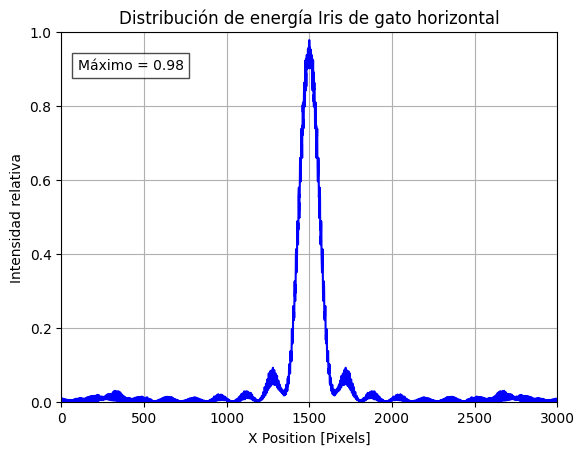

In [ ]:
plt.plot(U_f_gato[int(np.shape(U_f_gato)[0]/2)], color = 'blue')

plt.text(100, 0.9,
         f"Máximo = {np.max(U_f_gato[int(np.shape(U_f_gato)[0]/2)]):.2f}",
         fontsize = 10, color = "black",
         bbox = dict(facecolor = 'white', alpha=0.7, edgecolor = 'black'))

plt.grid()
plt.xlim([0, np.shape(U_f_gato)[0]])
plt.ylim([0, 1])
plt.xlabel('X Position [Pixels]')
plt.ylabel('Intensidad relativa')
plt.title(f"Distribución de energía Iris de gato horizontal")

Text(0.5, 1.0, 'Distribución de energía Iris de gato eje vertical a z = 80.')

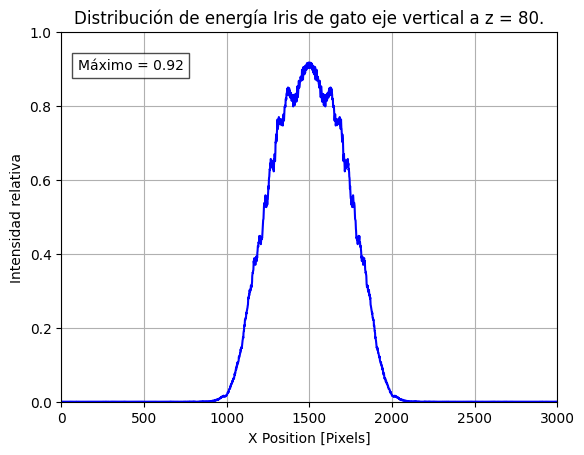

In [ ]:
plt.plot(np.rot90(U_f_gato)[int(np.shape(np.rot90(U_f_gato))[0]/2)], color = 'blue')

plt.text(100, 0.9,
         f"Máximo = {np.max(np.rot90(U_f_gato)[int(np.shape(np.rot90(U_f_gato))[0]/2)]):.2f}",
         fontsize = 10, color = "black",
         bbox = dict(facecolor = 'white', alpha=0.7, edgecolor = 'black'))

plt.grid()
plt.xlim([0, np.shape(U_f_gato)[0]])
plt.ylim([0, 1])
plt.xlabel('X Position [Pixels]')
plt.ylabel('Intensidad relativa')
plt.title(f"Distribución de energía Iris de gato eje vertical a z = {z_pea_gato}.")

Es claro que en el eje en el que presenta un espectro mas angosto, es en el que tiene mayor resolución si nos basamos en el desarrollo del criterio de Rayleigh, debido a que se requiere menos espaciamiento entre los puntos muestreados convolucionados por el espectro de la pupila para poder identificarlos como elementos individuales, esto ademas, se refleja con frecuencias horizontales dado que está sobre el eje horizontal.

## Calamar

Un calamar tiene la pupila en forma de w, aproximadamente.

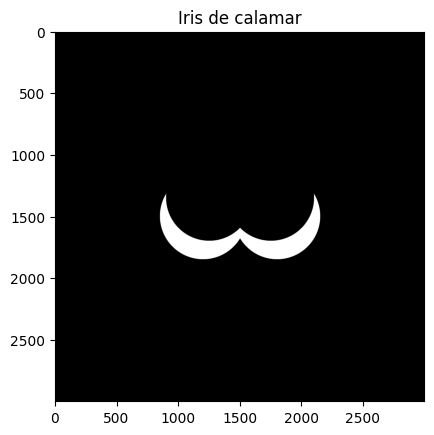

In [ ]:
iris_calamar = np.zeros((3000, 3000))

cv2.circle(iris_calamar, (1200, 1500), 350, 1, -1)
cv2.circle(iris_calamar, (1800, 1500), 350, 1, -1)

cv2.circle(iris_calamar, (1250, 1350), 350, 0, -1)
cv2.circle(iris_calamar, (1750, 1350), 350, 0, -1)

plt.imshow(iris_calamar, cmap = 'gray')
plt.title('Iris de calamar')
plt.show()

Difracción para la pupila de un calamar con iris en w:

In [ ]:
xp_calamar = np.shape(iris_humano)[0]
yp_calamar = np.shape(iris_humano)[1]

l_planex_calamar = 4 # mm
l_planey_calamar = 4 # mm

x_pea_calamar = np.linspace(0, l_planex_calamar, xp_calamar)
y_pea_calamar = np.linspace(0, l_planey_calamar, yp_calamar)

xv_pea_calamar, yv_pea_calamar = np.meshgrid(x_pea_calamar, y_pea_calamar)

In [ ]:
z_pea_calamar = 100

In [ ]:
U_calamar = compute_A(iris_calamar, xv_pea_calamar, yv_pea_calamar, lam_pea, z_pea_calamar)

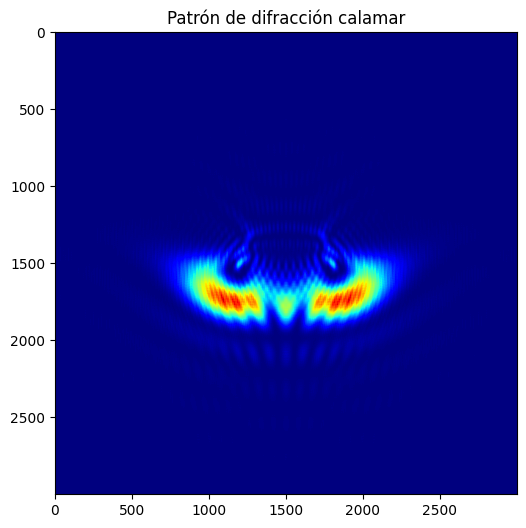

In [ ]:
U_f_calamar = normalize_image(intensidad_del_campo(U_calamar))

plt.figure(figsize=(6,6))
plt.imshow(U_f_calamar, cmap = 'jet')
plt.title('Patrón de difracción calamar')
plt.show()

En este caso podemos pensar en como afecta el FOV, y como hay menor capacidad de resolución sobre el eje horizontal, dado que el espectro es mas ancho en esa dirección.